In [ ]:
# Internal vs. External Company Reputation

Outline of Project

*   First steps 
    - Input company variable 
    - Format for Glassdoor URL
    - Already set for Tweepy
*   Using Tweepy and For loop from previous assignments for tweets and Glassdoor review
    - Pulling from Bonus lecture
    - Homework 2+3
*   Cleaning data set + Print word cloud
    - split() function
    - Normalization (stemming and lemmatization)
    - Remove stop words (remove_noise function)
    - Categorize text (3 different classifiers)
    - Top 30 positive and negative words using Word Cloud
*   2 models (mix and match with different classifiers)
*   Print confusion matrix, sensitivity, specificity, accuracy, and model with best accuracy

Resources (CITE in code and at the end too)
* https://www.kaggle.com/adepvenugopal/sentiment-analysis-of-glassdoor-review

* https://www.kaggle.com/sid321axn/natural-language-processing-sentiment-analysis
https://vu-d.gitbook.io/journey/data-analytics/glassdoor-scrape

* https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

* https://realpython.com/beautiful-soup-web-scraper-python/

* https://www.kaggle.com/sid321axn/natural-language-processing-sentiment-analysis





In [ ]:
# Tweepy allows us to access the twitter API in python
import tweepy as tw

# Pandas will allow us to extract tweets/users and load the data into dataframe 
import pandas as pd

# JSON will allow us to work with JSON files
import json

# json_normalize() will allows us to normalize semi-structured JSON data into a flat table
from pandas.io.json import json_normalize 

# Variables that contain the credentials to access Twitter API
# Use your own key and tokens instead
consumer_key    = "rMgBcDkAEiDKJHnIjkh8nwnLa"
consumer_secret = "y7jA77Bmr4rWUAdC5yImzlYBGtTVagTSwWqVciT0Kan6aQWlb5"
access_key      = "1326566976672641025-TbwphBECIGOu3FSZy3xbs1P7tHosI1"
access_secret   = "x0pVhadxslvbOfE6qxFVBSKRLlpxXJQ3A8lqeUXQug9P1"

# Setup access to API
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

# create the API object
api = tw.API(auth)

In [ ]:
# Twitter: External Reputation

# Begin code from https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/

# Define the search term and the date_since date as variables
# Ignoring all retweets by adding -filter:retweets
company = input('Please enter a company: ')

# Filtering out retweets
company_twitter = company + '-filter:retweets'

# pulling from 2016
date_since = "2018-11-16"

# Searching for tweets with the keyword as the company
tweets = tw.Cursor(api.search,
                       q=company_twitter,
                       lang="en",
                       since=date_since).items(140)

# Starting with an empty list to make a for loop
company_tweets = []

# Adding only the text of tweet to the list
for tweet in tweets:
    curr_tweet = tweet.text
    company_tweets.append(curr_tweet)

# End code from https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/

#company_tweets

In [ ]:
# Indeed: Internal reputation

# Import the necessary libraries
import requests
import re
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time

# Create an empty list to add our data to
internal_review_data = []

# Using company variable from previous chunk

# Format the company name so that it works in the URL for our web parser
if ' ' in company:
    company = company.replace(' ', '-')

webpage = "https://www.indeed.com/cmp/"+company+"/reviews?fcountry=ALL"
k = 20
PageNum = 7

# Creating a for loop to scape movie data from number of pages provided
for i in range(1, PageNum + 1):

    # First page is different from the rest, so I made an if statement to give it a custom url
    if i == 1:
        current_page = webpage
           
    # All other pages have this layout for the url
    else:
        current_page = webpage + '&start='+ str(k)
        k +=20

    #conducting a request of the stated URL above:
    page = requests.get(current_page)
    html = page.content
    #specifying a desired format of “page” using the html parser - this allows python to read the various components of the page, rather than treating it as one long string.
    soup = BeautifulSoup(html.decode('ascii', 'ignore'), 'lxml')
    reviews = soup.findAll('div', {'class':re.compile('cmp-Review-container')})

    for review in reviews:
        review_header, review_text, review_pros, review_cons, review_rating = 'NA', 'NA', 'NA', 'NA', 'NA'

    # Find the text for the header
        head = review.find('a', {'href':re.compile('/cmp/'+company+'/reviews/')})
        if head:
            review_header = head.text.strip()

      # Find the text for the main review text
        txt = review.find('div', {'class':re.compile('cmp-Review-text')})
        if txt:
            review_text = txt.text.strip()

      # Find the text from the pros/cons sections
        pros = review.find('div', {'class':re.compile('cmp-ReviewProsCons-prosText')})
        if pros:
            review_pros = pros.text.strip()

        cons = review.find('div', {'class':re.compile('cmp-ReviewProsCons-consText')})
        if cons:
            review_cons = cons.text.strip()

      # Find the number (out of 5) given as the rating
        rating = review.find('button', {'class':re.compile('cmp-ReviewRating-text')})
        if rating:
          review_rating = rating.text.strip()
       
        combined = review_text + review_pros + review_cons + review_rating
       # Add all of our data to the empty list we created earlier
        internal_review_data.append([review_header, review_text, review_pros, review_cons, review_rating])



In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Format our data into a Pandas data frame
internal_company_review_df = pd.DataFrame(internal_review_data, columns = ['Header', 'Review Text', 'Pros', 'Cons', 'Rating'])

# Create an empty list to append whether a review was positive (1) or not (0) and add to our Pandas data frame
internal_positive_review = []

for i in range(len(internal_company_review_df)):
  # Criteria for positivity is a review rating > than 3.0 as this is considered "neutral"
    if internal_company_review_df['Rating'][i] > '3.0':
        internal_positive_review.append(1)
    else:
        internal_positive_review.append(0)

# Add the built up list to our Pandas data frame
internal_company_review_df['Positive'] = internal_positive_review
#print(internal_company_review_df)

                            Header  ... Positive
0                 It's a fun place  ...        1
1      Google is getting political  ...        0
2                             Idkk  ...        0
3     Very Beautiful place to work  ...        1
4                           Google  ...        1
..                             ...  ...      ...
100  Productive and Fun work place  ...        1
101             Good place to work  ...        1
102    Very supportive environment  ...        1
103            Great peace of mind  ...        1
104                              1  ...        1

[105 rows x 6 columns]


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Clean the stop word and return clean data
def clean_the_stop_word(info):
  stop_words = stopwords.words('english')
  # print(stop_words)  
  # except the stop word
  clean_word = [word for word in info if word not in stop_words]
  return clean_word


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# count the sentiment score by word
from textblob import TextBlob

# the score is between -1 and 1
# [0, 1] means positive
# [-1, 0] meas negative
def get_score(word):
  blob = TextBlob(word)
  # print(blob.sentiment[0])
  return blob.sentiment[0]

0.5

In [ ]:
import nltk


nltk.download('punkt')
# cut down the text by nltk
def cut_down_text_to_words(text):
  # convert text list to a string
  text_string = " ".join(text)
  # cut down the words
  words = nltk.word_tokenize(text_string)
  return words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from numpy import *

# convert text to words

def convert_text_to_one_dimensional(text):
  word_list = []
  # flatten the list 
  word_list = array(text)
  # convert multi-dimensional data to one-dimensional data
  word_list = word_list.flatten()
  # convert to list
  word_list = list(word_list)
  return word_list


In [ ]:
# Plot the word cloud
from wordcloud import wordcloud
import matplotlib.pyplot as plt
import collections

def plot_word_cloud(all_word, name):

  # clean the data
  all_word = clean_the_stop_word(all_word)

  # init a dict
  dict_table_pos = collections.defaultdict(float)
  dict_table_neg = collections.defaultdict(float)

  # loop t#he postive word
  for w in all_word:
    # count the score
    score = get_score(w) 
    # if score > 0 is postive word
    if score > 0:
      dict_table_pos[w] = score
    # if socre < 0 is negative word
    if score < 0:
      dict_table_neg[w] = score


  # sort the postive result table
  dict_table_pos = sorted(dict_table_pos.items(), key=lambda x: x[1], reverse=True)

  # sort the negative result table
  dict_table_neg = sorted(dict_table_neg.items(), key=lambda x: x[1], reverse=False)

  # get top 30 positive words
  pos_list = []
 
  # if the number is bigger than 30
  if len(dict_table_pos) >= 30:
    # copy value to post_list
    for k,v in dict_table_pos[:30]:
      pos_list.append(k) 
  else:
    for k,v in dict_table_pos:
      pos_list.append(k)

  # get top 30 negative words
  neg_list = []

  if len(dict_table_neg) >= 30:
    for k, v in dict_table_neg[:30]:
      neg_list.append(k)
  else:
    for k, v in dict_table_neg:
      neg_list.append(k)

  # convert list to string gap by blank
  # print(pos_list)
  # print(neg_list)
  pos_list = " ".join(pos_list)
  neg_list = " ".join(neg_list)

  # combine positive and negative list
  result = pos_list + neg_list

  # print the cloud
  # confit the base info
  wc = wordcloud.WordCloud(
      # backgroud_color='black',
      width=1000,
      height=600,
      max_font_size=50,
      min_font_size=10,
      mask=plt.imread('https://pic1.zhimg.com/v2-b76b4152e6bfe6e6f15d46e4f7f1b83c_r.jpg'),
      max_words=60
  )  
  # generate the img
  wc.generate(result)
  # edit parameters of the word cloud image
  plt.figure(figsize=(8,6))
  plt.title("Top 30 most frequent words on "+name+" about "+company, fontsize=20)
  # input wc to plt
  plt.imshow(wc)
  # show the result
  plt.show()

/usr/local/lib/python3.6/dist-packages/wordcloud/wordcloud.py:721: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


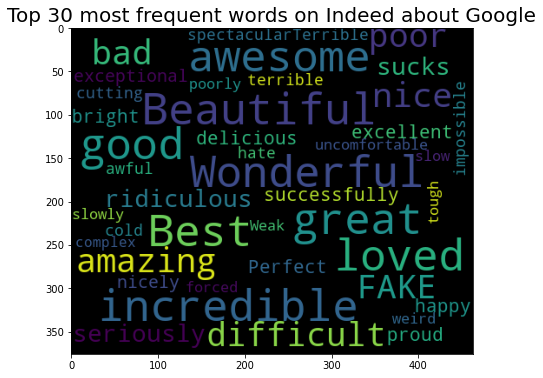

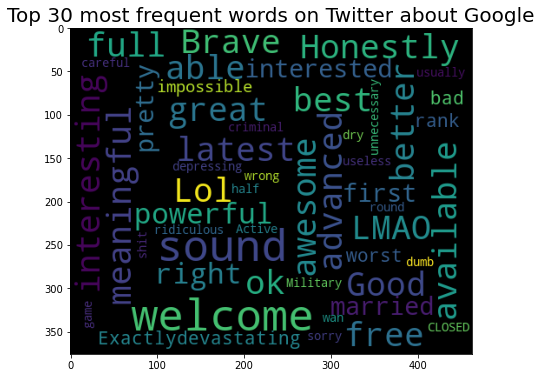

In [ ]:
# Show Top 30 positive and negative words using Word Cloud

# convert text to one dimensioanl
text_data = convert_text_to_one_dimensional(internal_review_data)
tweet_data = convert_text_to_one_dimensional(company_tweets)
# cut down the text to word
words = cut_down_text_to_words(text_data)
tweets = cut_down_text_to_words(tweet_data)
# exe word cloud
plot_word_cloud(words, "Indeed")
plot_word_cloud(tweets, "Twitter")


Text(0.5, 1.0, 'Google Tweet Sentiment')

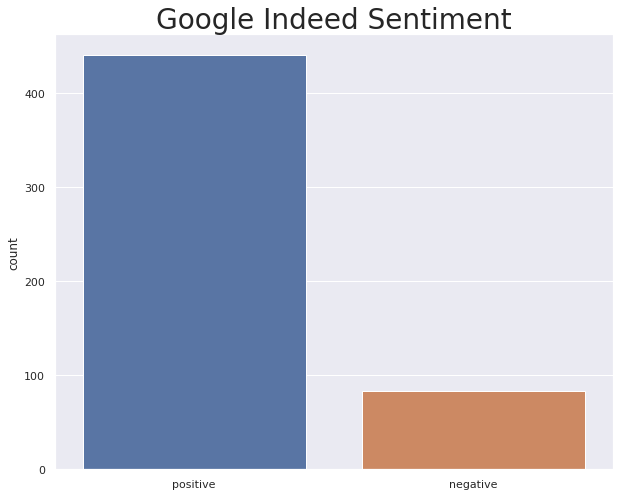

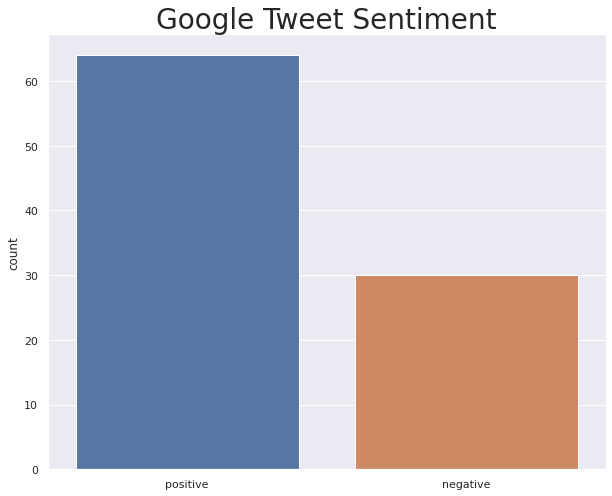

In [ ]:
# Using our sentiment score function, apply it to our Indeed and Twitter data to create a sentiment visualization

# Create empty lists to append our sentiment scores and number of 'positive' or 'negative' words
tweet_sentiment = []
indeed_sentiment = []
sentiment_results_t = []
sentiment_results_i = []

# Get our sentiment score for each word in our Indeed data
for i in range(len(words)):
  indeed_sentiment.append(get_score(words[i]))
# Get our sentiment score for each word in our Twitter data
for i in range(len(tweets)):
  tweet_sentiment.append(get_score(tweets[i]))

# Create a list with the number of positive/negative sentiments for both sets of data
for score in indeed_sentiment:
  if score > 0:
    sentiment_results_i.append('positive')
  elif score < 0:
    sentiment_results_i.append('negative')
  
for score in tweet_sentiment:
  if score > 0:
    sentiment_results_t.append('positive')
  elif score < 0:
    sentiment_results_t.append('negative')

import seaborn as sns

# Plot the sentiment scores
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.countplot(x=sentiment_results_i, order=['positive', 'negative']).set_title(company+' Indeed Sentiment', fontsize=28)

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.countplot(x=sentiment_results_t, order=['positive', 'negative']).set_title(company+' Tweet Sentiment', fontsize=28)


In [ ]:
# Calculating positivity score
positivity_score_i = sentiment_results_i.count('positive')/sentiment_results_i.count('negative')
positivity_score_t = sentiment_results_t.count('positive')/sentiment_results_t.count('negative')

# Printing scores for users and explaining their purpose
print("The positivity score of "+company+"'s sentiment on Indeed is "+str(round(positivity_score_i, 2)))
print("i.e. there are "+str(round(positivity_score_i, 2))+" more positive sentiments than negative ones")


print("\nThe positivity score of "+company+"'s sentiment on Twitter is "+str(round(positivity_score_t, 2)))
print("i.e. there are "+str(round(positivity_score_t, 2))+" more positive sentiments than negative ones")

The positivity score of Google's sentiment on Indeed is 5.3
i.e. there are 5.3 more positive sentiments than negative ones

The positivity score of Google's sentiment on Twitter is 2.13
i.e. there are 2.13 more positive sentiments than negative ones


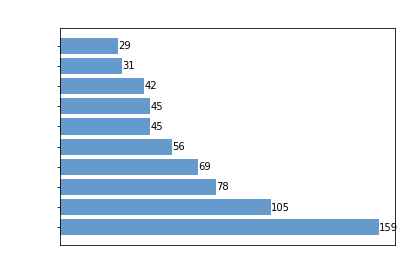

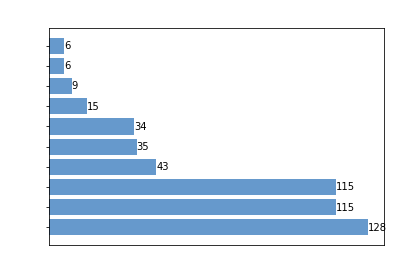

In [ ]:
# Import the necessary libraries
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import RegexpTokenizer


# plot histogram by words
def plot_histogram_by_words(words, name):

  # clean the data
  words = clean_the_stop_word(words)

  # except punctuation
  tokenizer = RegexpTokenizer(r'\w+')
  words = tokenizer.tokenize(" ".join(words))

  # count word
  wd = Counter(words)
  # get top 10 frequent word
  top_data = wd.most_common(10)

  # create two list to save data
  y_val = []
  x_val = []

  # init a subplot
  figure, axes = plt.subplots()

  # loop the top data
  for y, x in top_data:
    # add y col value
    y_val.append(y)
    # add x col value
    x_val.append(x)

  # add y_val, x_val to barh
  b = axes.barh(y_val, x_val, color='#6699CC')

  # add label to axes
  for tmp in b:
    # get the width
    width = tmp.get_width()
    # add text, set the layout
    axes.text(width, tmp.get_y() + tmp.get_height()/2, "%d" % int(width), ha="left", va="center")

  # set y_val lable
  axes.set_yticklabels(y_val)

  # set y_val color to while
  [b.set_color(a) for (a, b) in zip(['white']*len(y_val), axes.yaxis.get_ticklabels()) ]

  # drop out the axis x lable
  plt.xticks(())

  # print(top_data)
  plt.title('top 10 words by ' + name, fontsize='20', loc='center', color='white')

  # show the plot
  plt.show()


plot_histogram_by_words(words, 'Indeed')
plot_histogram_by_words(tweets, 'Twitter')

In [ ]:
# Naive Bayes Indeed model

# Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

def word_cut(text):
  return " ".join(nltk.word_tokenize(text))

# Build MultinomialNB model to categorize text 
# def categorize_text(internal_company_review_df):

  # get the review text column
x_text = internal_company_review_df[['Review Text']]

  # user apply function to cut down the sentence
x_text['cutted_comment'] = x_text['Review Text'].apply(word_cut)

  # get the lable from internal_company_review_df
y_text = internal_company_review_df['Positive']

  # print(x_text)

  # print(y_text)

  # split the data to train data and test data 
x_train, x_test, y_train, y_test = train_test_split(x_text, y_text, random_state=1)

  # convert word to vector
vect = CountVectorizer(stop_words=frozenset(stopwords.words("english")))
  # Converts a segmented training set statement with the vectorization tool
term_matrix = pd.DataFrame(vect.fit_transform(x_train.cutted_comment).toarray(), columns=vect.get_feature_names())

  # create Multinomial naive bayes model
nb = MultinomialNB()

  # combine vect and nb
pipe = make_pipeline(vect, nb)
accuracy = cross_val_score(pipe, x_train.cutted_comment, y_train, cv=5, scoring='accuracy').mean()
accuracy_indeed = str(round(accuracy, 3))
#res = categorize_text(internal_company_review_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# ouput the accuracy by Multinomial naive bayes model

print("The Multinomial naive bayes model: accuracy of our classifier for Indeed data is " + str(accuracy_indeed))

# Printing confusion matrix
from sklearn.metrics import confusion_matrix

# Applying model to test set
y_pred = cross_val_predict(pipe, x_test.cutted_comment, y_test, cv=5)

# Using confusion matrix function
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Determining whether model has greater sensitivity, specificity, or neither
if cm[0][1] > cm[1][0]:
    print('This model has more false positives and therefore has high sensitivity.')
elif cm[1][0] > cm[0][1]:
    print('This model has more false negatives and therefore has high specificity.')
else:
    print('This model does not have high specificity nor high sensitivity.')

The Multinomial naive bayes model: accuracy of our classifier for Indeed data is 0.821
[[ 0  3]
 [ 0 24]]
This model has more false positives and therefore has high sensitivity.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
# Logistic Regression for Indeed data

# Import models and evaluation functions
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
#from sklearn import cross_validation
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Import vectorizers to turn text into numeric
from sklearn.feature_extraction.text import CountVectorizer

# First, we want to go from text to numeric data
# Separate out the X and Y data
X_text = internal_company_review_df['Review Text']
Y = internal_company_review_df['Positive']

# Create a vectorizer that will track text as binary features
count_vectorizer = CountVectorizer()

# Let the vectorizer learn what tokens exist in the text data
count_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = count_vectorizer.transform(X_text)

# Create a model
logistic_regression = LogisticRegression()

# Splitting into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# Use this model and our data to get 5-fold cross validation AUCs
aucs = cross_val_score(logistic_regression, x_train, y_train, scoring="accuracy", cv=5)



In [ ]:
# Print out the average AUC rounded to three decimal points
print("Accuracy of our Logistic Regression classifier for the Indeed data is " + str(round(np.mean(aucs), 3)))

# Applying model to test set
y_pred = cross_val_predict(logistic_regression, x_test, y_test, cv=5)

# Using confusion matrix function
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Determining whether model has greater sensitivity, specificity, or neither
if cm[0][1] > cm[1][0]:
    print('This model has more false positives and therefore has high sensitivity.')
elif cm[1][0] > cm[0][1]:
    print('This model has more false negatives and therefore has high specificity.')
else:
    print('This model does not have high specificity nor high sensitivity.')

Accuracy of our Logistic Regression classifier for the Indeed data is 0.822
[[ 0  3]
 [ 0 24]]
This model has more false positives and therefore has high sensitivity.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
# Naive Bayes Twitter model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

def word_cut(text):
  return " ".join(nltk.word_tokenize(text))

# Build MultinomialNB model to categorize text 
# def categorize_text(internal_company_review_df):

  # get the review text column
x_text = company_tweets

positive = []
# Begin code from https://www.freecodecamp.org/news/how-to-build-a-twitter-sentiments-analyzer-in-python-using-textblob-948e1e8aae14/
for tweet in x_text:
    analysis = TextBlob(tweet)    

    if analysis.sentiment[0]>0:       
        positive.append(1)    
    elif analysis.sentiment[0]<0:       
        positive.append(0)
    else:
        positive.append(1) 
# End code from https://www.freecodecamp.org/news/how-to-build-a-twitter-sentiments-analyzer-in-python-using-textblob-948e1e8aae14/

d = {'Tweet':company_tweets,'Positive':positive}
twitter_data = pd.DataFrame(d)

  # get the review text column
x_text = twitter_data[['Tweet']]

  # user apply function to cut down the sentence
x_text['cutted_comment'] = x_text['Tweet'].apply(word_cut)

  # get the lable from internal_company_review_df
y_text = twitter_data['Positive']

  # print(x_text)

  # print(y_text)

  # split the data to train data and test data 
x_train, x_test, y_train, y_test = train_test_split(x_text, y_text, random_state=1)

  # convert word to vector
vect = CountVectorizer(stop_words=frozenset(stopwords.words("english")))
  # Converts a segmented training set statement with the vectorization tool
term_matrix = pd.DataFrame(vect.fit_transform(x_train.cutted_comment).toarray(), columns=vect.get_feature_names())

  # create Multinomial naive bayes model
nb = MultinomialNB()

  # combine vect and nb
pipe = make_pipeline(vect, nb)
accuracy = cross_val_score(pipe, x_train.cutted_comment, y_train, cv=5, scoring='accuracy').mean()
accuracy_indeed = str(round(accuracy, 3))

In [ ]:
# output the accuracy by Multinomial naive bayes model

print("The Multinomial naive bayes model: accuracy of our classifier for Twitter data is " + str(accuracy_indeed))

# Printing confusion matrix
from sklearn.metrics import confusion_matrix

# Applying model to test set
y_pred = cross_val_predict(pipe, x_test.cutted_comment, y_test, cv=5)

# Using confusion matrix function
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Determining whether model has greater sensitivity, specificity, or neither
if cm[0][1] > cm[1][0]:
    print('This model has more false positives and therefore has high sensitivity.')
elif cm[1][0] > cm[0][1]:
    print('This model has more false negatives and therefore has high specificity.')
else:
    print('This model does not have high specificity nor high sensitivity.')

The Multinomial naive bayes model: accuracy of our classifier for Twitter data is 0.876
[[ 2  4]
 [ 0 29]]
This model has more false positives and therefore has high sensitivity.


In [ ]:
# Logistic Regression for Twitter data

# Import models and evaluation functions
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
#from sklearn import cross_validation
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Import vectorizers to turn text into numeric
from sklearn.feature_extraction.text import CountVectorizer

# First, we want to go from text to numeric data
# Separate out the X and Y data
X_text = twitter_data['Tweet']
Y = twitter_data['Positive']

# Create a vectorizer that will track text as binary features
count_vectorizer = CountVectorizer()

# Let the vectorizer learn what tokens exist in the text data
count_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = count_vectorizer.transform(X_text)

# Create a model
logistic_regression = LogisticRegression()

# Splitting into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# Use this model and our data to get 5-fold cross validation AUCs
aucs = cross_val_score(logistic_regression, x_train, y_train, scoring="accuracy", cv=5)



In [ ]:
# Print out the average AUC rounded to three decimal points
print("Accuracy of our Logistic Regression classifier for the Twitter data is " + str(round(np.mean(aucs), 3)))

# Applying model to test set
y_pred = cross_val_predict(logistic_regression, x_test, y_test, cv=5)

# Using confusion matrix function
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Determining whether model has greater sensitivity, specificity, or neither
if cm[0][1] > cm[1][0]:
    print('This model has more false positives and therefore has high sensitivity.')
elif cm[1][0] > cm[0][1]:
    print('This model has more false negatives and therefore has high specificity.')
else:
    print('This model does not have high specificity nor high sensitivity.')

Accuracy of our Logistic Regression classifier for the Twitter data is 0.876
[[ 2  4]
 [ 0 29]]
This model has more false positives and therefore has high sensitivity.
